# Analyzing Presidential Debates

## Group Members - Purvi Thakor, Junior Ovince, Akshay Kamath
<br>
With the midterms around the corner & politics dominating the news, we decided to analyze Presidential debates for our NLP project. We found datasets available on [UC Barbara's The American Presidency Project](https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/presidential-candidates-debates-1960-2016).

We discussed & decided to analyze the presidential debates from 2000 onwards which meant we worked on 5 sets of debates - 

* <font color=blue>Gore<font color=black> v <font color=red>Bush<font color=black> _(2000)_
  -  [Presidential Debate in St Louis, Missouri](https://www.presidency.ucsb.edu/ws/index.php?pid=29420)
  -  [Presidential Debate in Winston-Salem, North Carolina](https://www.presidency.ucsb.edu/ws/index.php?pid=29419)
  -  [Presidential Debate in Boston, Massachusetts](https://www.presidency.ucsb.edu/ws/index.php?pid=29418)
<br>
<br>
* <font color=blue>Kerry<font color=black> v <font color=red>Bush<font color=black> _(2004)_
  -  [Presidential Debate in Tempe, Arizona](https://www.presidency.ucsb.edu/ws/index.php?pid=63163)
  -  [Presidential Debate in St Louis, Missouri](https://www.presidency.ucsb.edu/ws/index.php?pid=72776)
  -  [Presidential Debate in Coral Gables, Florida](https://www.presidency.ucsb.edu/ws/index.php?pid=72770)
<br>
<br>
* <font color=blue>Obama<font color=black> v <font color=red>McCain<font color=black> _(2008)_
  -  [Presidential Debate in Hempstead, New York](https://www.presidency.ucsb.edu/ws/index.php?pid=84526)
  -  [Presidential Debate in Nashville, Tennessee](https://www.presidency.ucsb.edu/ws/index.php?pid=84482)
  -  [Presidential Debate in Oxford, Mississippi](https://www.presidency.ucsb.edu/ws/index.php?pid=78691)
<br>
<br>
* <font color=blue>Obama<font color=black> v <font color=red>Romney<font color=black> _(2012)_
  -  [Presidential Debate at Lynn University in Boca Raton, Florida](https://www.presidency.ucsb.edu/ws/index.php?pid=102344)
  -  [Presidential Debate at Hofstra University in Hempstead, New York](https://www.presidency.ucsb.edu/ws/index.php?pid=102343)
  -  [Presidential Debate at the University of Denver, Colorado](https://www.presidency.ucsb.edu/ws/index.php?pid=102317)
<br>
<br>
* <font color=blue>Clinton<font color=black> v <font color=red>Trump<font color=black> _(2016)_
  -  [Presidential Debate at the University of Nevada, Las Vegas](https://www.presidency.ucsb.edu/ws/index.php?pid=119039)
  -  [Presidential Debate at Washington University in St. Louis, Missouri](https://www.presidency.ucsb.edu/ws/index.php?pid=119038)
  -  [Presidential Debate at Hofstra University in Hempstead, New York](https://www.presidency.ucsb.edu/ws/index.php?pid=119012)
<br>
<br>
    
Furthermore, we decided to analyze both the victory & concession speeches for all the candidates.
    


## 1 - Preprocessing

The data was manually scraped from the abovementioned site & stored in text files. Thankfully, the format across each of the documents was more or less the same & we ended up saving a lot of time in the initial few steps. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
#!pip install gensim

In [44]:
import pandas as pd
import os
import re
import tabulate
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
import time
import nltk
import html
#nltk.download()
import scattertext as st
#nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()
import webbrowser
import gensim
import string

from scattertext import word_similarity_explorer
from collections import Counter
from string import punctuation
from textstat.textstat import textstatistics, easy_word_set, legacy_round
from re import sub

from nltk.corpus import wordnet as wn
from nltk.stem import *
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer, sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

from gensim.summarization.summarizer import summarize
from gensim import corpora, models
from gensim.summarization import keywords
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

stemmer = PorterStemmer()

In [4]:
print(os.getcwd())

C:\Users\akkif\NLP\finalproject


In [5]:
wrkdir = os.chdir("D:/Project/NLP/presidential_debates/")

def read_file(filename):
    input_file_text = open(filename).read()
    return input_file_text

file_list=[]
for file in os.listdir(wrkdir):
    file_list.append(file) 

file_list

['2000_gore_v_bush_university_massachusetts_MA.txt',
 '2000_gore_v_bush_wake_forest_university_NC.txt',
 '2000_gore_v_bush_washington_university_MO.txt',
 '2004_bush_v_kerry_arizona_state_university_AZ.txt',
 '2004_bush_v_kerry_university_of_miami_FL.txt',
 '2004_bush_v_kerry_washington_university_MO.txt',
 '2008_obama_v_mccain_hofstra_university_NY.txt',
 '2008_obama_v_mccain_university_of_nashville_TN.txt',
 '2008_obama_v_mccain_university_of_oxford_MS.txt',
 '2012_obama_v_romney_hofstra_university_NY.txt',
 '2012_obama_v_romney_lynn_university_FL.txt',
 '2012_obama_v_romney_university_of_denver_CO.txt',
 '2016_trump_v_clinton_hofstra_university_NY.txt',
 '2016_trump_v_clinton_university_of_nevada_NV.txt',
 '2016_trump_v_clinton_washington_university_MO.txt',
 'Term-Use-Visualization.html']

In [6]:
for i in file_list:
    file = open(i,'rt')
    file_read = file.read()
    print("\n")
    print(125*"+")
    print(file.name)
    print(125*"+")
    print("\n")
    file.close()
    print(file_read)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2000_gore_v_bush_university_massachusetts_MA.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODERATOR: Good evening from the Clark Athletic Center at the University of Massachusetts in Boston. I'm Jim Lehrer of the NewsHour on PBS, and I welcome you to the first of three 90-minute debates between the Democratic candidate for president, Vice President Al Gore and the Republican candidate, Governor George W. Bush of Texas. The debates are sponsored by the Commission on Presidential Debates and they will be conducted within formats agreed to between the two campaigns. We'll have the candidates at podiums. No answer to a question can exceed two minutes. Rebuttal is limited to one minute. But as moderator I have the option to follow up and extend any give and take any three-and-a-h

MODERATOR: We will continue this dialogue next week on October 11th at Wake Forest University in Winston-Salem, North Carolina. The format then will be more informal, more conversational with the two candidates seated at a table with me. The third will be October 17th at Washington University in St. Louis, and that will follow a town-hall type format. October 5 there is a 90-minute debate between Senator Joe Lieberman and Secretary Dick Cheney. It will be held at Center College in Danville, Kentucky. The moderator will be Bernard Shaw of CNN. Thank you, Governor Bush, Vice President Gore. See you next week. For now from Boston, I'm Jim Lehrer. Thank you, and good night.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2000_gore_v_bush_wake_forest_university_NC.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODERATOR: Let's w

MODERATOR: And we will return next Tuesday night, October 17th, from Washington University in St. Louis for the third and final debate. Thank you, Vice President Gore, Governor Bush. See you next week. For now, from Winston-Salem, I'm Jim Lehrer, thank you and good night.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2000_gore_v_bush_washington_university_MO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODERATOR: Good evening from the Field House at Washington University in St. Louis. I'm Jim Lehrer of the News Hour on PBS. And I welcome you to this third and final Campaign 2000 debate between the Democratic candidate for president, Vice President Al Gore, and the Republican candidate, Governor George W. Bush of Texas. Let's welcome the candidates now. Before proceeding tonight we would like to observe a moment of silen

MODERATOR: A closing piece of business before we go. The Debate Commission wants reaction to the three kinds of formats used in the debates this year, and you may register an opinion at their website at www.debates.org. Vice President Gore, Governor Bush, thank you. And good night from Washington University in St. Louis.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2004_bush_v_kerry_arizona_state_university_AZ.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Bob Schieffer. Good evening from Arizona State University in Tempe, Arizona. I'm Bob Schieffer of CBS News. I want to welcome you to the third and last of the 2004 debates between President George Bush and Senator John Kerry.

As Jim Lehrer told you before the first one, these debates are sponsored by the Commission on Presidential Debates. Tonight the topic will be do




+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2004_bush_v_kerry_university_of_miami_FL.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Jim Lehrer. Good evening from the University of Miami Convocation Center in Coral Gables, Florida. I'm Jim Lehrer of the News Hour on PBS. And I welcome you to the first of the 2004 Presidential debates between President George W. Bush, the Republican nominee, and Senator John Kerry, the Democratic nominee.

These debates are sponsored by the Commission on Presidential Debates. Tonight's will last 90 minutes, following detailed rules of engagement worked out by representatives of the candidates. I have agreed to enforce their rules on them. The umbrella topic is foreign policy and homeland security. But the specific subjects were chosen by me. The questions were composed by me. The candida




+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2004_bush_v_kerry_washington_university_MO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODERATOR: Good evening from the Field House at Washington University in St. Louis. I'm Jim Lehrer of the News Hour on PBS. And I welcome you to this third and final Campaign 2000 debate between the Democratic candidate for president, Vice President Al Gore, and the Republican candidate, Governor George W. Bush of Texas. Let's welcome the candidates now. Before proceeding tonight we would like to observe a moment of silence in memory of Governor Mel Carnahan of Missouri, who along with his son and his former chief of staff, died in a private plane crash last night near St. Louis. A reminder, as we continue now, that these debates are sponsored by the Commission on Presidential Debates. T

MODERATOR: A closing piece of business before we go. The Debate Commission wants reaction to the three kinds of formats used in the debates this year, and you may register an opinion at their website at www.debates.org. Vice President Gore, Governor Bush, thank you. And good night from Washington University in St. Louis.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


SCHIEFFER: Good evening. And welcome to the third and last presidential debate of 2008, sponsored by the Commission on Presidential Debates. I'm Bob Schieffer of CBS News.

The rules tonight are simple. The subject is domestic policy. I will divide the next hour-and-a-half into nine-minute segments.

I will ask a question at the beginning of each segment. Each candidate wi

This concludes the final debate. I'm Bob Schieffer of CBS News, and I will leave you tonight with what my mother always said -- go vote now. It will make you feel big and strong. Good night, everyone.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_university_of_nashville_TN.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


BROKAW: Good evening from Belmont University in Nashville, Tennessee. I'm Tom Brokaw of NBC News. And welcome to this second presidential debate, sponsored by the Commission on Presidential Debates.

Tonight's debate is the only one with a town hall format. The Gallup Organization chose 80 uncommitted voters from the Nashville area to be here with us tonight. And earlier today, each of them gave me a copy of their question for the candidates.

From all of these questions -- and from tens

Thank you, Senator McCain. Thank you, Senator Obama. Good night, everyone, from Nashville.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_university_of_oxford_MS.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


LEHRER: Gentlemen, at this very moment tonight, where do you stand on the financial recovery plan?

First response to you, Senator Obama. You have two minutes.

OBAMA: Well, thank you very much, Jim, and thanks to the commission and the University of Mississippi, "Ole Miss," for hosting us tonight. I can't think of a more important time for us to talk about the future of the country.

You know, we are at a defining moment in our history. Our nation is involved in two wars, and we are going through the worst financial crisis since the Great Depression.

And although we've heard a lot about Wall Stre




+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Moderator Candy Crowley. Good evening from Hofstra University in Hempstead, New York. I'm Candy Crowley from CNN's "State of the Union."

We are here for the second Presidential Debate, a town hall sponsored by the Commission on Presidential Debates. The Gallup organization chose 82 uncommitted voters from the New York area. Their questions will drive the night. My goal is to give the conversation direction and to ensure questions get answered.

The questions are known to me and my team only. Neither the commission, nor the candidates have seen them. I hope to get to as many questions as possible, and because I am the optimistic sort, I'm sure the candidates will oblige by keeping their a

The next and final debate takes place Monday night at Lynn University in Boca Raton, Florida. Don't forget to watch. Election day is 3 weeks from today. Don't forget to vote. Goodnight.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_lynn_university_FL.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Moderator Bob Schieffer. Good evening from the campus of Lynn University here in Boca Raton, Florida. This is the fourth and last debate of the 2012 campaign, brought to you by the Commission on Presidential Debates. This one is on foreign policy. I'm Bob Schieffer of CBS News.

The questions are mine, and I have not shared them with the candidates or their aides. The audience has taken a vow of silence: no applause, no reaction of any kind, except right now, when we welcome President Barack Obama and Governor

Mr. Schieffer. Good night.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_university_of_denver_CO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Moderator Jim Lehrer. Good evening from the Magness Arena at the University of Denver, in Denver, Colorado. I'm Jim Lehrer of the PBS NewsHour, and I welcome you to the first of the 2012 Presidential Debates between President Barack Obama, the Democratic nominee, and former Massachusetts Governor Mitt Romney, the Republican nominee.

This debate and the next three—two Presidential, one Vice Presidential—are sponsored by the Commission on Presidential Debates. Tonight's 90 minutes will be about domestic issues and will follow a format designed by the Commission. There will be six roughly 15-minute segments, with 2-minute answers for the first question, then open

The next debate will be the Vice Presidential event on Thursday, October 11, at Centre College in Danville, Kentucky. For now, from the University of Denver, I'm Jim Lehrer. Thank you, and good night.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


HOLT: Good evening from Hofstra University in Hempstead, New York. I'm Lester Holt, anchor of "NBC Nightly News." I want to welcome you to the first presidential debate.

The participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight's format, and the rules have been agreed to by the campaigns.

The 90-minute debate is divided into six segments, each 15 mi

A reminder. The vice presidential debate is scheduled for October 4th at Longwood University in Farmville, Virginia. My thanks to Hillary Clinton and to Donald Trump and to Hofstra University for hosting us tonight. Good night, everyone.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_university_of_nevada_NV.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


WALLACE: Good evening from the Thomas and Mack Center at the University of Nevada, Las Vegas. I'm Chris Wallace of Fox News, and I welcome you to the third and final of the 2016 presidential debates between Secretary of State Hillary Clinton and Donald J. Trump.

This debate is sponsored by the Commission on Presidential Debates. The commission has designed the format: Six roughly 15-minute segments with two-minute answers to the first question, then op

While millions have already voted, Election Day, November 8th, is just 20 days away. One thing everyone here can agree on: We hope you will go vote. It is one of the honors and obligations of living in this great country. Thank you, and good night.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_washington_university_MO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


RADDATZ: Ladies and gentlemen the Republican nominee for president, Donald J. Trump, and the Democratic nominee for president, Hillary Clinton. [applause]

COOPER: Thank you very much for being here. We're going to begin with a question from one of the members in our town hall. Each of you will have two minutes to respond to this question. Secretary Clinton, you won the coin toss, so you'll go first. Our first question comes from Patrice Bro

RADDATZ: Please tune in on October 19th for the final presidential debate that will take place at the University of Nevada, Las Vegas. Good night, everyone.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Term-Use-Visualization.html
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



As we can see, the format of the files is slightly different. Initially, the conversation begins with the speaker's name in proper format & then it gets converted to upper format. So we realized that each document needs to be cleansed separately.

### 1.1 (2000) Presidential Debate Data Cleaning

In [7]:
all_files = []

for i in file_list:
    if '2000' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)
        
string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('Senator Kerry.','KERRY:') #replacing one instance of proper string with upper
file_read2 = file_read1.replace('President Bush.','BUSH:') #replacing one instance of proper string with upper
GB_2000 = re.findall(r'BUSH:(.*?)(?:GORE:|LEHRER:|SCHIEFFER:|MODERATOR:|MEMBER OF AUDIENCE:)', file_read2) #extracting comments made by Bush only
AG_2000 = re.findall(r'GORE:(.*?)(?:BUSH:|LEHRER:|SCHIEFFER:|MODERATOR:|MEMBER OF AUDIENCE:)', file_read2) #extracting comments made by Gore only

GB_2000_wc = ''.join(GB_2000)
AG_2000_wc = ''.join(AG_2000)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2000_gore_v_bush_university_massachusetts_MA.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




MODERATOR: Good evening from the Clark Athletic Center at the University of Massachusetts in Boston. I'm Jim Lehrer of the NewsHour on PBS, and I welcome you to the first of three 90-minute debates between the Democratic candidate for president, Vice President Al Gore and the Republican candidate, Governor George W. Bush of Texas. The debates are sponsored by the Commission on Presidential Debates and they will be conducted within formats agreed to between the two campaigns. We'll have the candidates at podiums. No answer to a question can exceed two minutes. Rebuttal is limited to one minute. But as moderator I have the option to follow up and extend any give and take any three-and-a-half minutes. Even then, no single answer can exceed two minutes. The candidates under their rules may not question each other directly. There will be no opening statements, but each candidate may have up to two minutes for a closing statement. The questions and the subjects were chosen by me alone. I hav



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2000_gore_v_bush_wake_forest_university_NC.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




MODERATOR: Let's welcome the candidates, Governor Bush and Vice President Gore. Good evening, from Wake Chapel at Wake Forest University at Winston-Salem, North Carolina. I'm Jim Lehrer of the News Hour on PBS. Welcome to this second election 2000 debate between the Republican candidate for president, George W. Bush of Texas, and the Democratic candidate, Vice President Al Gore. These debates are sponsored by the Commission on Presidential Debates. The format and the rules are those negotiated by representatives of the two campaigns. Only the subjects tonight and the questions are mine. The format tonight is that of a conversation. The only prevailing rule is that no single response can ever, ever exceed two minutes. The prevailing rule for the audience here in the hall is as always, absolute quiet, please. Good evening, Governor Bush, Vice President Gore. The end of our 90 minutes last week in Boston, the total time each of you took was virtually the same. Let's see if we can do the s



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2000_gore_v_bush_washington_university_MO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




MODERATOR: Good evening from the Field House at Washington University in St. Louis. I'm Jim Lehrer of the News Hour on PBS. And I welcome you to this third and final Campaign 2000 debate between the Democratic candidate for president, Vice President Al Gore, and the Republican candidate, Governor George W. Bush of Texas. Let's welcome the candidates now. Before proceeding tonight we would like to observe a moment of silence in memory of Governor Mel Carnahan of Missouri, who along with his son and his former chief of staff, died in a private plane crash last night near St. Louis. A reminder, as we continue now, that these debates are sponsored by the Commission on Presidential Debates. The formats and the rules were worked out by the commission and the two campaigns. Tonight's questions will be asked by St. Louis area voters who were identified as being uncommitted by the Gallup organization. Earlier today each of them wrote a question on a small card like this. Those cards were collec

In [8]:
print("George Bush's word count in the 2000 presidential debates is " + str("{:,}".format(len(GB_2000_wc))) + " words.")
print("Al Gore's word count in the 2000 presidential debates is " + str("{:,}".format(len(AG_2000_wc))) + " words.")

George Bush's word count in the 2000 presidential debates is 116,400 words.
Al Gore's word count in the 2000 presidential debates is 108,651 words.


### 1.2 (2004) Presidential Debate Data Cleaning

In [9]:
all_files = []

for i in file_list:
    if '2004' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)
        
string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('Kerry:','KERRY: ') #replacing one instance of proper string with upper
file_read2 = file_read1.replace('Bush: ','BUSH: ') #replacing one instance of proper string with upper
GB_2004 = re.findall(r'BUSH:(.*?)(?:KERRY:|LEHRER:|SCHIEFFER:|MODERATOR:|MEMBER OF AUDIENCE:)', file_read2) #extracting comments made by McCain only
JK_2004 = re.findall(r'KERRY:(.*?)(?:BUSH:|LEHRER:|SCHIEFFER:|MODERATOR:|MEMBER OF AUDIENCE:)', file_read2) #extracting comments made by Obama only

GB_2004_wc = ''.join(GB_2004)
JK_2004_wc = ''.join(JK_2004)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2004_bush_v_kerry_arizona_state_university_AZ.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Bob Schieffer. Good evening from Arizona State University in Tempe, Arizona. I'm Bob Schieffer of CBS News. I want to welcome you to the third and last of the 2004 debates between President George Bush and Senator John Kerry.As Jim Lehrer told you before the first one, these debates are sponsored by the Commission on Presidential Debates. Tonight the topic will be domestic affairs, but the format will be the same as that first debate. I'll moderate our discussion under detailed rules agreed to by the candidates, but the questions and the areas to be covered were chosen by me. I have not told the candidates or anyone else what they are.To refresh your memory on the rules, I will ask a question. The candidate is allowed 2 minutes to answer. His opponent then has a minute and a half to offer a rebuttal. At my discretion, I can extend the discussion by offering each candidate an additional 30 seconds. A green light will come on to signal the candidate has 30 seconds left; a yellow light si



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2004_bush_v_kerry_university_of_miami_FL.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Jim Lehrer. Good evening from the University of Miami Convocation Center in Coral Gables, Florida. I'm Jim Lehrer of the News Hour on PBS. And I welcome you to the first of the 2004 Presidential debates between President George W. Bush, the Republican nominee, and Senator John Kerry, the Democratic nominee.These debates are sponsored by the Commission on Presidential Debates. Tonight's will last 90 minutes, following detailed rules of engagement worked out by representatives of the candidates. I have agreed to enforce their rules on them. The umbrella topic is foreign policy and homeland security. But the specific subjects were chosen by me. The questions were composed by me. The candidates have not been told what they are, nor has anyone else.For each question, there can only be a 2-minute response, a 90-second rebuttal, and at my discretion, a discussion extension of 1 minute. A green light will come on when 30 seconds remain in any given answer, yellow at 15, red at 5 seconds, and t



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2004_bush_v_kerry_washington_university_MO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




MODERATOR: Good evening from the Field House at Washington University in St. Louis. I'm Jim Lehrer of the News Hour on PBS. And I welcome you to this third and final Campaign 2000 debate between the Democratic candidate for president, Vice President Al Gore, and the Republican candidate, Governor George W. Bush of Texas. Let's welcome the candidates now. Before proceeding tonight we would like to observe a moment of silence in memory of Governor Mel Carnahan of Missouri, who along with his son and his former chief of staff, died in a private plane crash last night near St. Louis. A reminder, as we continue now, that these debates are sponsored by the Commission on Presidential Debates. The formats and the rules were worked out by the commission and the two campaigns. Tonight's questions will be asked by St. Louis area voters who were identified as being uncommitted by the Gallup organization. Earlier today each of them wrote a question on a small card like this. Those cards were collec

In [10]:
print("George Bush's word count in the 2004 presidential debates is " + str("{:,}".format(len(GB_2004_wc))) + " words.")
print("John Kerry's word count in the 2004 presidential debates is " + str("{:,}".format(len(JK_2004_wc))) + " words.")

George Bush's word count in the 2004 presidential debates is 105,301 words.
John Kerry's word count in the 2004 presidential debates is 79,328 words.


### 1.3 (2008) Presidential Debate Data Cleaning

In [11]:
all_files = []

for i in file_list:
    if '2008' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)
        
string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('McCain:','MCCAIN:') #replacing one instance of proper string with upper
file_read2 = file_read1.replace('Obama:','OBAMA:') #replacing one instance of proper string with upper
JM_2008 = re.findall(r'MCCAIN:(.*?)(?:OBAMA:|LEHRER:|SCHIEFFER:|BROKAW:)', file_read2) #extracting comments made by McCain only
BO_2008 = re.findall(r'OBAMA:(.*?)(?:MCCAIN:|LEHRER:|SCHIEFFER:|BROKAW:)', file_read2) #extracting comments made by Obama only

JM_2008_wc = ''.join(JM_2008)
BO_2008_wc = ''.join(BO_2008)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




SCHIEFFER: Good evening. And welcome to the third and last presidential debate of 2008, sponsored by the Commission on Presidential Debates. I'm Bob Schieffer of CBS News.The rules tonight are simple. The subject is domestic policy. I will divide the next hour-and-a-half into nine-minute segments.I will ask a question at the beginning of each segment. Each candidate will then have two minutes to respond, and then we'll have a discussion.I'll encourage them to ask follow-up questions of each other. If they do not, I will.The audience behind me has promised to be quiet, except at this moment, when we welcome Barack Obama and John McCain.Gentlemen, welcome.By now, we've heard all the talking points, so let's try to tell the people tonight some things that they -- they haven't heard. Let's get to it.Another very bad day on Wall Street, as both of you know. Both of you proposed new plans this week to address the economic crisis.Sen. McCain, you proposed a $52 billion plan that includes new 



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_university_of_nashville_TN.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




BROKAW: Good evening from Belmont University in Nashville, Tennessee. I'm Tom Brokaw of NBC News. And welcome to this second presidential debate, sponsored by the Commission on Presidential Debates.Tonight's debate is the only one with a town hall format. The Gallup Organization chose 80 uncommitted voters from the Nashville area to be here with us tonight. And earlier today, each of them gave me a copy of their question for the candidates.From all of these questions -- and from tens of thousands submitted online -- I have selected a long list of excellent questions on domestic and foreign policy.Neither the commission nor the candidates have seen the questions. And although we won't be able to get to all of them tonight, we should have a wide-ranging discussion one month before the election.Each candidate will have two minutes to respond to a common question, and there will be a one-minute follow-up. The audience here in the hall has agreed to be polite, and attentive, no cheering or 



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_university_of_oxford_MS.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




LEHRER: Gentlemen, at this very moment tonight, where do you stand on the financial recovery plan?First response to you, Senator Obama. You have two minutes.OBAMA: Well, thank you very much, Jim, and thanks to the commission and the University of Mississippi, "Ole Miss," for hosting us tonight. I can't think of a more important time for us to talk about the future of the country.You know, we are at a defining moment in our history. Our nation is involved in two wars, and we are going through the worst financial crisis since the Great Depression.And although we've heard a lot about Wall Street, those of you on Main Street I think have been struggling for a while, and you recognize that this could have an impact on all sectors of the economy.And you're wondering, how's it going to affect me? How's it going to affect my job? How's it going to affect my house? How's it going to affect my retirement savings or my ability to send my children to college?So we have to move swiftly, and we have

In [12]:
print("Barack Obama's word count in the 2008 presidential debates is " + str("{:,}".format(len(BO_2008_wc))) + " words.")
print("John McCain's word count in the 2008 presidential debates is " + str("{:,}".format(len(JM_2008_wc))) + " words.")

Barack Obama's word count in the 2008 presidential debates is 121,759 words.
John McCain's word count in the 2008 presidential debates is 112,023 words.


### 1.4 (2012) Presidential Debate Data Cleaning

In [13]:
all_files = []

for i in file_list:
    if '2012' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)

string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('Gov. Romney.',' ROMNEY:') #replacing all instances of proper string with upper
file_read2 = file_read1.replace('The President.',' OBAMA:') #replacing all instances of proper string with upper
file_read3 = file_read2.replace('Mr. Lehrer.',' LEHRER:') #replacing all instances of proper string with upper
file_read4 = file_read3.replace('Mr. Schieffer.',' SCHIEFFER:') #replacing all instances of proper string with upper
file_read5 = file_read4.replace('Ms. Crowley.',' CROWLEY:') #replacing all instances of proper string with upper

MR_2012 = re.findall(r' ROMNEY:(.*?)(?:OBAMA:| LEHRER:| SCHIEFFER:| CROWLEY:)', file_read5) #extracting comments made by Romney only
BO_2012 = re.findall(r' OBAMA:(.*?)(?:ROMNEY:| LEHRER:| SCHIEFFER:| CROWLEY:)', file_read5) #extracting comments made by Obama only

MR_2012_wc = ''.join(MR_2012)
BO_2012_wc = ''.join(BO_2012)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Moderator Candy Crowley. Good evening from Hofstra University in Hempstead, New York. I'm Candy Crowley from CNN's "State of the Union."We are here for the second Presidential Debate, a town hall sponsored by the Commission on Presidential Debates. The Gallup organization chose 82 uncommitted voters from the New York area. Their questions will drive the night. My goal is to give the conversation direction and to ensure questions get answered.The questions are known to me and my team only. Neither the commission, nor the candidates have seen them. I hope to get to as many questions as possible, and because I am the optimistic sort, I'm sure the candidates will oblige by keeping their answers concise and on point.Each candidate has as much as 2 minutes to respond to a common question, and there will be a 2-minute follow-up. The audience here in the hall has agreed to be polite and attentive; no cheering, no booing, or outbursts of any sort.We will set aside that agreement just this once 



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_lynn_university_FL.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Moderator Bob Schieffer. Good evening from the campus of Lynn University here in Boca Raton, Florida. This is the fourth and last debate of the 2012 campaign, brought to you by the Commission on Presidential Debates. This one is on foreign policy. I'm Bob Schieffer of CBS News.The questions are mine, and I have not shared them with the candidates or their aides. The audience has taken a vow of silence: no applause, no reaction of any kind, except right now, when we welcome President Barack Obama and Governor Mitt Romney.They've asked me to divide the evening into segments. I'll pose a question at the beginning of each segment. You'll each have 2 minutes to respond, and then, we will have a general discussion until we move to the next segment.Tonight's debate, as both of you know, comes on the 50th anniversary of the night that President Kennedy told the world that the Soviet Union had installed nuclear missiles in Cuba, perhaps the closest we've ever come to nuclear war. And it is a so



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_university_of_denver_CO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Moderator Jim Lehrer. Good evening from the Magness Arena at the University of Denver, in Denver, Colorado. I'm Jim Lehrer of the PBS NewsHour, and I welcome you to the first of the 2012 Presidential Debates between President Barack Obama, the Democratic nominee, and former Massachusetts Governor Mitt Romney, the Republican nominee.This debate and the next three—two Presidential, one Vice Presidential—are sponsored by the Commission on Presidential Debates. Tonight's 90 minutes will be about domestic issues and will follow a format designed by the Commission. There will be six roughly 15-minute segments, with 2-minute answers for the first question, then open discussion for the remainder of each segment.Thousands of people offered suggestions on segment subjects or questions via the Internet and other means, but I made the final selections. And for the record, they were not submitted for approval to the Commission or the candidates.The segments, as I announced in advance, will be three

In [14]:
print("Barack Obama's word count in the 2012 presidential debates is " + str("{:,}".format(len(BO_2012_wc))) + " words.")
print("Mitt Romney's word count in the 2012 presidential debates is " + str("{:,}".format(len(MR_2012_wc))) + " words.")

Barack Obama's word count in the 2012 presidential debates is 124,529 words.
Mitt Romney's word count in the 2012 presidential debates is 124,418 words.


### 1.5 (2016) Presidential Debate Data Cleaning

In [15]:
all_files = []

for i in file_list:
    if '2016' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)

string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('Trump:',' TRUMP:') #replacing all instances of proper string with upper
file_read2 = file_read1.replace('Clinton:',' CLINTON:') #replacing all instances of proper string with upper
file_read3 = file_read2.replace('Holt:',' HOLT:') #replacing all instances of proper string with upper
file_read4 = file_read3.replace('Wallace:',' WALLACE:') #replacing all instances of proper string with upper
file_read5 = file_read4.replace('Raddatz:',' RADDATZ:') #replacing all instances of proper string with upper
file_read6 = file_read5.replace('Cooper:',' COOPER:') #replacing all instances of proper string with upper

DT_2016 = re.findall(r'TRUMP:(.*?)(?:CLINTON:|HOLT:|WALLACE:|RADDATZ:|COOPER:)', file_read6) #extracting comments made by Trump only
HC_2016 = re.findall(r'CLINTON:(.*?)(?:TRUMP:|HOLT:|WALLACE:|RADDATZ:|COOPER:)', file_read6) #extracting comments made by Clinton only

DT_2016_wc = ''.join(DT_2016)
HC_2016_wc = ''.join(HC_2016)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




HOLT: Good evening from Hofstra University in Hempstead, New York. I'm Lester Holt, anchor of "NBC Nightly News." I want to welcome you to the first presidential debate.The participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight's format, and the rules have been agreed to by the campaigns.The 90-minute debate is divided into six segments, each 15 minutes long. We'll explore three topic areas tonight: Achieving prosperity; America's direction; and securing America. At the start of each segment, I will ask the same lead-off question to both candidates, and they will each have up to two minutes to respond. From that point until the end of the segment, we'll have an open discussion.The questions are mine and have not been shared with the commission or the campaigns. The audience here in the room has agreed to remain silent so that we can focus on what



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_university_of_nevada_NV.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




WALLACE: Good evening from the Thomas and Mack Center at the University of Nevada, Las Vegas. I'm Chris Wallace of Fox News, and I welcome you to the third and final of the 2016 presidential debates between Secretary of State Hillary Clinton and Donald J. Trump.This debate is sponsored by the Commission on Presidential Debates. The commission has designed the format: Six roughly 15-minute segments with two-minute answers to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to those rules.For the record, I decided the topics and the questions in each topic. None of those questions has been shared with the commission or the two candidates. The audience here in the hall has promised to remain silent. No cheers, boos, or other interruptions so we and you can focus on what the candidates have to say.No noise, except right now, as we welcome the Democratic nominee for president, Secretary Clinton, and the Republican nominee for president, Mr. T



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_washington_university_MO.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




RADDATZ: Ladies and gentlemen the Republican nominee for president, Donald J. Trump, and the Democratic nominee for president, Hillary Clinton. [applause]COOPER: Thank you very much for being here. We're going to begin with a question from one of the members in our town hall. Each of you will have two minutes to respond to this question. Secretary Clinton, you won the coin toss, so you'll go first. Our first question comes from Patrice Brock. Patrice?QUESTION: Thank you, and good evening. The last debate could have been rated as MA, mature audiences, per TV parental guidelines. Knowing that educators assign viewing the presidential debates as students' homework, do you feel you're modeling appropriate and positive behavior for today's youth?CLINTON: Well, thank you. Are you a teacher? Yes, I think that that's a very good question, because I've heard from lots of teachers and parents about some of their concerns about some of the things that are being said and done in this campaign.And 

In [16]:
print("Donald Trump's word count in the 2016 presidential debates is " + str("{:,}".format(len(DT_2016_wc))) + " words.")
print("Hillary Clinton's word count in the 2016 presidential debates is " + str("{:,}".format(len(HC_2016_wc))) + " words.")

Donald Trump's word count in the 2016 presidential debates is 121,193 words.
Hillary Clinton's word count in the 2016 presidential debates is 106,863 words.


## 2 - Analysis

### 2.1 - Word Count

#### 2.1.1 - Word Count (Without Cleaning)

<br>
Without discarding any information, on a very superficial level, we can see that Obama has had the highest word count in a presidential debate followed by Romney in 2012.
<br>

George Bush's word count in the 2004 presidential debates is 105,301 words.
John Kerry's word count in the 2004 presidential debates is 79,328 words.

| Year | Nominee | Word Count |
| --- | --- | --- |
| 2000 | <font color=blue>Gore<font color=black> | 108,651 |
| **2000** | <font color=red>**Bush**<font color=black> | **116,400** |
| 2004 | <font color=blue>Kerry<font color=black> | 79,328 |
| **2004** | <font color=red>**Bush**<font color=black> | **105,301** |    
| **2008** | <font color=blue>**Obama**<font color=black> | **121,759** |
| 2008 | <font color=red>McCain<font color=black> | 112,023 |    
| **2012** | <font color=blue>**Obama**<font color=black> | **124,529** |
| 2012 | <font color=red>Romney<font color=black> | 124,418 |    
| 2016 | <font color=blue>Clinton<font color=black> | 106,863 |
| **2016** | <font color=red>**Trump**<font color=black> | **121,193** |
 

#### 2.1.2 - Word Count (With Cleaning)

In [17]:
#wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [18]:
def word_count(data):
    data = "".join(data)
    data = word_tokenize(data)
    data = [w for w in data if not w in stop_words]
    wc_lst = len(data)
    return wc_lst

In [19]:
wc_files = [AG_2000,GB_2000,JK_2004,GB_2004,BO_2008,JM_2008,BO_2012,MR_2012,HC_2016,DT_2016]
lst = ['Gore (2000)','Bush (2000)','Kerry (2004)','Bush (2004)','Obama (2008)','McCain (2008)','Obama (2012)','Romney (2012)','Clinton (2016)','Trump (2016)']

wc = []
for i in wc_files:
    wc_vals = word_count(i)
    wc.append(wc_vals)

word_count = pd.DataFrame({'Nominee':lst,'Words':wc})
word_count

,Nominee,Words
0,Gore (2000),13292
1,Bush (2000),15312
2,Kerry (2004),9973
3,Bush (2004),13751
4,Obama (2008),14336
5,McCain (2008),13590
6,Obama (2012),14825
7,Romney (2012),15612
8,Clinton (2016),13090
9,Trump (2016),16320


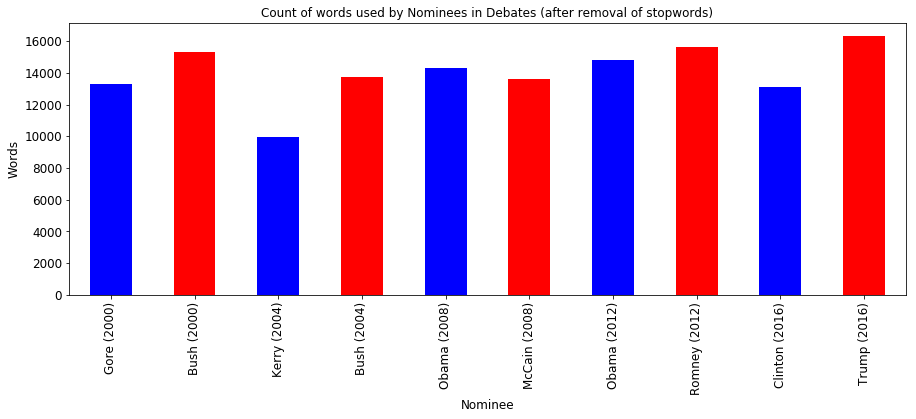

In [20]:
ax = word_count.plot(kind='bar',x='Nominee',y='Words',figsize=(15,5),legend = True, fontsize = 12,color=['blue', 'red', 'blue', 'red', 'blue', 'red','blue', 'red', 'blue','red'])
ax.set_xlabel("Nominee", fontsize=12)
ax.set_ylabel("Words", fontsize=12)
ax.get_legend().remove()
ax.set_title('Count of words used by Nominees in Debates (after removal of stopwords)')
plt.show()

### 2.2 Text Similarity

#### 2.2.1 Jacardian Similarity

In [21]:
start_time_jac = time.time()

regex = r"(?<!\d)[....'--'``](?!\d)"
punc = str.maketrans('', '', sub("\"'", '', punctuation))

def cleaner(data):
    data = "".join(data)
    data = data.replace("..."," ")
    data = data.replace("."," ")
    data = re.sub(regex, "", data)
    data = data.translate(punc)
    data = word_tokenize(data)
    data = [w for w in data if not w in stop_words]    
    
    return data

def jacardian_distance(file1, file2):
    file1 = cleaner(file1)
    file2 = cleaner(file2)
    intersection = len(list(set(file1).intersection(set(file2))))
    union = (len(set(file1)) + len(set(file2))) - intersection
    jacardian = float(intersection/ union)
    
    return jacardian


In [22]:
file_list = [AG_2000,GB_2000,JK_2004,GB_2004,BO_2008,JM_2008,BO_2012,MR_2012,HC_2016,DT_2016]

jac_mat = np.zeros(shape = (len(file_list), len(file_list)))
jac_mat = pd.DataFrame(jac_mat)#, index=6, columns=6)

for a in range(len(file_list)):
    for b in range(len(file_list)):
        #print(jacardian_distance(file_list[a], file_list[b]))
        jac_mat[a][b] = jacardian_distance(file_list[a], file_list[b])

jac_mat = jac_mat.rename(columns={0 : "Gore'00",
                                  1 : "Bush'00",
                                  2 : "Kerry'04",
                                  3 : "Bush'04",
                                  4 : "Obama'08",
                                  5 : "McCain'08",
                                  6 : "Obama'12",
                                  7 : "Romney'12",
                                  8 : "Clinton'16",
                                  9 : "Trump'16"
                                 },
                        index =  {0 : "Gore'00",
                                  1 : "Bush'00",
                                  2 : "Kerry'04",
                                  3 : "Bush'04",
                                  4 : "Obama'08",
                                  5 : "McCain'08",
                                  6 : "Obama'12",
                                  7 : "Romney'12",
                                  8 : "Clinton'16",
                                  9 : "Trump'16"
                                 })

exec_time_jac = time.time()-start_time_jac
print(exec_time_jac)

18.6740403175354


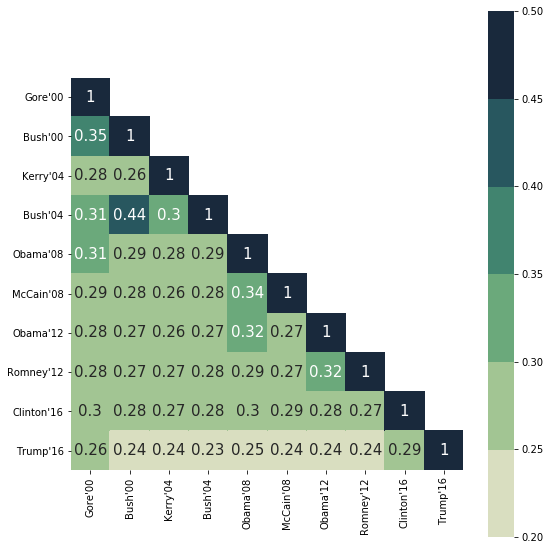

In [23]:
plt.figure(figsize=(8,8))
mask =  np.tri(jac_mat.shape[1],k=-1)
hm_j = sns.heatmap(jac_mat,
                cbar=True,
                square=True,
#                fmt='d',
                annot = True,
                annot_kws={'size': 15},
                cmap=sns.cubehelix_palette(rot=-.57),
                mask = mask.T,
                vmin = 0.2, vmax = .5
                )

# Show heat map
plt.tight_layout()
plt.show()

#### 2.2.2 Cosine Similarity

In [24]:
start_time_cos = time.time() 

def cosine_similarity(file1, file2):
    
    file1 = cleaner(file1)
    file2 = cleaner(file2)

    combined = sorted(list(set(file1 + file2)), key=str.lower)
    
    counts_1 = {}
    counts_2 = {}
    
    for i in combined:
        counts_1[i]=file1.count(i)
        counts_2[i]=file2.count(i)
    
    document_1_vector = np.array( list(counts_1.values() ) ) # len is same as combined
    document_2_vector = np.array( list(counts_2.values() ) )  # len is same as combined
    
    dot_product_of_two_document_vectors = np.dot(document_1_vector, document_2_vector)
    
    norm_1 = np.linalg.norm(document_1_vector)
    norm_2 = np.linalg.norm(document_2_vector)
    
    cosine_similarity = dot_product_of_two_document_vectors / (norm_1 * norm_2)
    return cosine_similarity

In [25]:
cos_mat = np.zeros(shape = (len(file_list), len(file_list)))
cos_mat = pd.DataFrame(cos_mat)#, index=6, columns=6)

for a in range(len(file_list)):
    for b in range(len(file_list)):
        cos_mat[a][b] = cosine_similarity(file_list[a], file_list[b])

cos_mat = cos_mat.rename(columns={0 : "Gore'00",
                                  1 : "Bush'00",
                                  2 : "Kerry'04",
                                  3 : "Bush'04",
                                  4 : "Obama'08",
                                  5 : "McCain'08",
                                  6 : "Obama'12",
                                  7 : "Romney'12",
                                  8 : "Clinton'16",
                                  9 : "Trump'16"
                                 },
                        index =  {0 : "Gore'00",
                                  1 : "Bush'00",
                                  2 : "Kerry'04",
                                  3 : "Bush'04",
                                  4 : "Obama'08",
                                  5 : "McCain'08",
                                  6 : "Obama'12",
                                  7 : "Romney'12",
                                  8 : "Clinton'16",
                                  9 : "Trump'16"
                                 })

exec_time_cos = time.time()-start_time_cos
print(exec_time_cos)

207.42340636253357


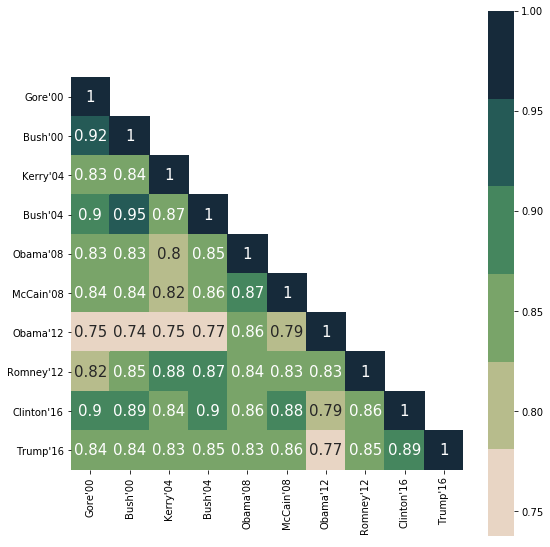

In [26]:
plt.figure(figsize=(8,8))
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

mask =  np.tri(cos_mat.shape[1],k=-1)

hm_c = sns.heatmap(cos_mat,
                cbar=True,
                square=True,
                annot = True,
                cmap=sns.cubehelix_palette(rot=-.7),
                annot_kws={'size': 15},
                mask=mask.T,
#                vmin=.7,vmax=1
                  )

# Show heat map
plt.tight_layout()
plt.show()

### 2.3 Word Usage

#### 2.3.1 Most Frequently Used Words

In [27]:
# using a whitespace tokenizer to split words better

ws = WhitespaceTokenizer()
regex = r"(?<!\d)[?!,""-](?!\d)"
punc = str.maketrans('', '', sub("\'", '', punctuation))

# removing punctuations and stop words

words_to_rem = stopwords.words('english')

# newStopWords = ["we're","they're","i'm","that's"]
# words_to_rem.extend(newStopWords)

def cln_tok(data):
    data = "".join(data)
    data = data.replace("--","")
    data = data.replace("``","")
    data = data.replace("..."," ")
    data = data.replace("."," ")
    data = re.sub(regex, "", data)
    data = data.translate(punc)
    data = data.lower()
    data = ws.tokenize(data)
    data = [w for w in data if not w in words_to_rem]
    return data

def freq(data):
    data1 = cln_tok(data)
#    data = nltk.pos_tag(data)
    d = {}
    for i in data1:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    
    return dict(Counter(d).most_common(10))

file_list = [AG_2000,GB_2000,JK_2004,GB_2004,BO_2008,JM_2008,BO_2012,MR_2012,HC_2016,DT_2016]
lst = ['Gore (2000)','Bush (2000)','Kerry (2004)','Bush (2004)','Obama (2008)','McCain (2008)','Obama (2012)','Romney (2012)','Clinton (2016)','Trump (2016)']

freq_lst = []
for i in file_list:
    freq_lst.append(freq(i))

old_dict={}
for i, d in enumerate(freq_lst):
    old_dict[i] = d
    
new_dict = {0: 'Gore (2000)', 1: 'Bush (2000)', 2:'Kerry (2004)', 3: 'Bush (2004)', 4: 'Obama (2008)', 5: 'McCain (2008)', 6: 'Obama (2012)',7: 'Romney (2012)',8: 'Clinton (2016)',9: 'Trump (2016)'}

common_words=dict((new_dict[key], value) for (key, value) in old_dict.items())
common_words

{'Gore (2000)': {'think': 139,
  'would': 86,
  'governor': 74,
  'years': 72,
  'one': 69,
  'new': 66,
  'want': 66,
  'people': 64,
  'make': 62,
  'know': 58},
 'Bush (2000)': {'think': 159,
  'people': 150,
  'going': 110,
  "that's": 98,
  'get': 98,
  'want': 97,
  "i'm": 91,
  'president': 82,
  'money': 80,
  'make': 79},
 'Kerry (2004)': {'president': 166,
  'people': 73,
  'going': 73,
  'america': 72,
  "that's": 60,
  'said': 57,
  "we're": 49,
  'think': 48,
  "i'm": 45,
  "i've": 45},
 'Bush (2004)': {'people': 133,
  "that's": 95,
  'think': 93,
  'get': 73,
  "we're": 67,
  "i'm": 67,
  'going': 65,
  'make': 62,
  'want': 60,
  'one': 60},
 'Obama (2008)': {'going': 180,
  'think': 128,
  'make': 118,
  'got': 108,
  "that's": 103,
  'mccain': 99,
  "we've": 94,
  "we're": 87,
  'senator': 79,
  'people': 70},
 'McCain (2008)': {'obama': 111,
  'know': 109,
  'senator': 88,
  'going': 84,
  'america': 69,
  'people': 69,
  'would': 68,
  "that's": 67,
  'got': 63,
  '

In [28]:
def cln(data):
    data = "".join(data)
    data = data.replace("--","")
    data = data.replace("``","")
    data = data.replace("..."," ")
    data = data.replace("."," ")
    data = re.sub(regex, "", data)
    data = data.translate(punc)
    data = data.replace("  "," ")
    data = data.lower()
    data = [data]
    return data

file_list = [AG_2000,GB_2000,JK_2004,GB_2004,BO_2008,JM_2008,BO_2012,MR_2012,HC_2016,DT_2016]

lst2 = []

for i in file_list:    
    lst2.append(cln(i))

df = pd.DataFrame(lst2)
df.columns = ["speech"]

df['party'] = ""
df['speaker'] = ""
df["year"] = ""

df = df[["party","speaker","year","speech"]]
df['party'] = ["Dem","Rep","Dem","Rep","Dem","Rep","Dem","Rep","Dem","Rep"]
df['speaker'] = ["Gore","Bush","Kerry","Bush","Obama","McCain","Obama","Romney","Clinton","Trump"]
df['year'] = ["2000","2000","2004","2004","2008","2008","2012","2012","2016","2016"]

In [29]:
corpus = st.CorpusFromPandas(df,
                             category_col='party',
                             text_col='speech',
                             nlp=nlp).build()

term_freq_df = corpus.get_term_freq_df()
term_freq_df['Democratic Score'] = corpus.get_scaled_f_scores('Dem')
term_freq_df['Republic Score'] = corpus.get_scaled_f_scores('Rep')
#term_freq_df = (term_freq_df['term'].str.len() > 3)
term_freq_df.head(10)

,Dem freq,Rep freq,Democratic Score,Republic Score
term,,,,
well,242,254,0.125447,0.874553
jim,55,26,0.879725,0.120275
first,138,123,0.875035,0.124965
of,2134,2396,0.116356,0.883644
all,320,403,0.101780,0.898220
i,2537,3117,0.104822,0.895178
would,323,272,0.881674,0.118326
like,159,214,0.093872,0.906128
to,3714,4097,0.118700,0.881300


#### 2.3.2 Visualizing Word Usage by Party

In [30]:
html = st.produce_scattertext_explorer(corpus,
          category='Dem',
          category_name='Democratic',
          not_category_name='Rep',
          width_in_pixels=1000,
          metadata=df['speaker'])

In [31]:
open("Term-Use-Visualization.html", 'wb').write(html.encode('utf-8'))
webbrowser.open("file:///D:/Project/NLP/presidential_debates/Term-Use-Visualization.html")

True

In [32]:
corpus = (st.CorpusFromPandas(df,
                              category_col='party',
                              text_col='speech',
                              nlp=st.whitespace_nlp_with_sentences)
          .build()
          .get_unigram_corpus()
          .compact(st.ClassPercentageCompactor(term_count=2,
                                               term_ranker=st.OncePerDocFrequencyRanker)))

In [33]:
html = st.produce_characteristic_explorer(
    corpus,
    category='Dem',
    category_name='Democratic',
    not_category_name='Rep',
    metadata=corpus.get_df()['speaker'])

In [34]:
open('Characteristic-Chart.html', 'wb').write(html.encode('utf-8'))
webbrowser.open("file:///D:/Project/NLP/presidential_debates/Characteristic-Chart.html")

True

### Topic Identification

#### Latent Dirichlet Allocation (LDA)

In [45]:
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 5:
            result.append(stemmer.stem(token))
    return result

In [47]:
file_list = [AG_2000,GB_2000,JK_2004,GB_2004,BO_2008,JM_2008,BO_2012,MR_2012,HC_2016,DT_2016]
filelst = ['Gore(2000) ','Bush(2000) ','Kerry(2004) ','Bush(2004) ','Obama(2008) ','McCain(2008) ','Obama(2012) ','Romney(2012) ','Clinton(2016) ','Trump(2016) ']

In [48]:
def lda_loop(name):
    new_list = []
    for i in range(len(name)):
        data = preprocess(name[i])
        new_list.append(data)

    dictionary = gensim.corpora.Dictionary(new_list)
    count = 0
    for k, v in dictionary.iteritems():
    #    print(k, v)
        count += 1

    bow_corpus = [dictionary.doc2bow(doc) for doc in new_list]
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = 8, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2)

    topics_lst = []
    for idx, topic in lda_model.print_topics(-1):
        topics_lst.append(topic)

    lda_df = pd.DataFrame(
        {'candidate':"",
         'topics': topics_lst
        })
    lda_df
    return (lda_df)
 #   return(#lda_df.style.set_properties(subset=['topics'], **{'width': '1000px'}))
    
    

In [49]:
lda_list = []
for i in file_list:
    a = lda_loop(i)
    lda_list.append(a)
    print("*")
    
final_lda = pd.concat(lda_list)
candidate_lst= []

for i in filelst:
    candidate_lst.append((i*8).split())

candidate_lst_new = [item for sublist in candidate_lst for item in sublist]

final_lda['candidate'] = candidate_lst_new

*
*
*
*
*
*
*
*
*
*


In [50]:
final_lda1 = final_lda.reset_index()
final_lda1.style.set_properties(subset=['topics'], **{'width': '1000px'})

,index,candidate,topics
0,0,Gore(2000),"0.018*""peopl"" + 0.018*""medicar"" + 0.018*""compani"" + 0.017*""prescript"" + 0.012*""parent"" + 0.011*""governor"" + 0.010*""senior"" + 0.009*""propos"" + 0.009*""campaign"" + 0.009*""work"""
1,1,Gore(2000),"0.018*""propos"" + 0.013*""support"" + 0.012*""medicar"" + 0.012*""governor"" + 0.011*""believ"" + 0.010*""countri"" + 0.009*""militari"" + 0.008*""incom"" + 0.007*""prescript"" + 0.007*""peopl"""
2,2,Gore(2000),"0.017*""nation"" + 0.013*""secur"" + 0.013*""governor"" + 0.012*""peopl"" + 0.012*""presid"" + 0.012*""involv"" + 0.011*""support"" + 0.008*""singl"" + 0.008*""state"" + 0.008*""militari"""
3,3,Gore(2000),"0.019*""governor"" + 0.016*""health"" + 0.015*""famili"" + 0.014*""peopl"" + 0.014*""nation"" + 0.013*""secur"" + 0.012*""question"" + 0.012*""propos"" + 0.011*""promis"" + 0.010*""prosper"""
4,4,Gore(2000),"0.022*""serbia"" + 0.018*""elect"" + 0.017*""sanction"" + 0.015*""milosev"" + 0.013*""tri"" + 0.013*""support"" + 0.010*""question"" + 0.010*""result"" + 0.009*""work"" + 0.009*""presid"""
5,5,Gore(2000),"0.022*""secur"" + 0.018*""social"" + 0.017*""support"" + 0.012*""serv"" + 0.011*""propos"" + 0.009*""governor"" + 0.008*""countri"" + 0.008*""educ"" + 0.008*""committe"" + 0.008*""import"""
6,6,Gore(2000),"0.067*""school"" + 0.023*""governor"" + 0.020*""teacher"" + 0.018*""govern"" + 0.016*""peopl"" + 0.015*""public"" + 0.013*""student"" + 0.013*""children"" + 0.013*""number"" + 0.012*""health"""
7,7,Gore(2000),"0.020*""differ"" + 0.017*""energi"" + 0.015*""technolog"" + 0.012*""develop"" + 0.012*""incent"" + 0.009*""propos"" + 0.009*""administr"" + 0.009*""futur"" + 0.009*""domest"" + 0.009*""preciou"""
8,0,Bush(2000),"0.028*""peopl"" + 0.019*""presid"" + 0.017*""middl"" + 0.015*""million"" + 0.013*""import"" + 0.013*""administr"" + 0.012*""timet"" + 0.012*""foreign"" + 0.012*""explor"" + 0.012*""saddam"""
9,1,Bush(2000),"0.030*""senior"" + 0.026*""peopl"" + 0.015*""medicar"" + 0.013*""democrat"" + 0.013*""prescript"" + 0.013*""presid"" + 0.010*""patient"" + 0.009*""washington"" + 0.009*""support"" + 0.009*""question"""
